In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datasist as ds

sns.set(rc={'figure.figsize': [13, 13]}, font_scale=1.2)

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# df.groupby('Ticket').mode()
df.groupby(['Cabin']).sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584,0,1,36.0,0,0,40.1250
A14,476,0,1,0.0,0,0,52.0000
A16,557,1,1,48.0,1,0,39.6000
A19,285,0,1,0.0,0,0,26.0000
A20,600,1,1,49.0,1,0,56.9292
...,...,...,...,...,...,...,...
F33,930,3,6,87.0,0,0,34.0000
F38,777,0,3,0.0,0,0,7.7500
F4,803,2,4,5.0,4,2,78.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [7]:
df['title']=df['Name'].str.split().str[1].str.split('.').str[0]

In [8]:
df['title'].value_counts()

Mr              502
Miss            179
Mrs             121
Master           40
Dr                7
Rev               6
y                 4
Impe,             3
Planke,           3
Major             2
Col               2
Mlle              2
Gordon,           2
Mulder,           1
Shawah,           1
Cruyssen,         1
Pelsmaeker,       1
Ms                1
Billiard,         1
Jonkheer          1
Steen,            1
Carlo,            1
Messemaeker,      1
der               1
Don               1
Walle,            1
the               1
Melkebeke,        1
Velde,            1
Capt              1
Mme               1
Name: title, dtype: int64

In [9]:
top_title = list(df['title'].value_counts().sort_values(ascending=False).head(6).index)

In [10]:
top_title

['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']

In [11]:
for label in top_title:
    df[label] = np.where(df['title']==label,1,0)

In [12]:
df.drop(['title'],axis=1,inplace=True)

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master,Dr,Rev
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,0,0


In [14]:
df['Cabin'] = df['Cabin'].str[0]

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master,Dr,Rev
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1,0,0,0,0,0


<AxesSubplot:xlabel='Cabin', ylabel='count'>

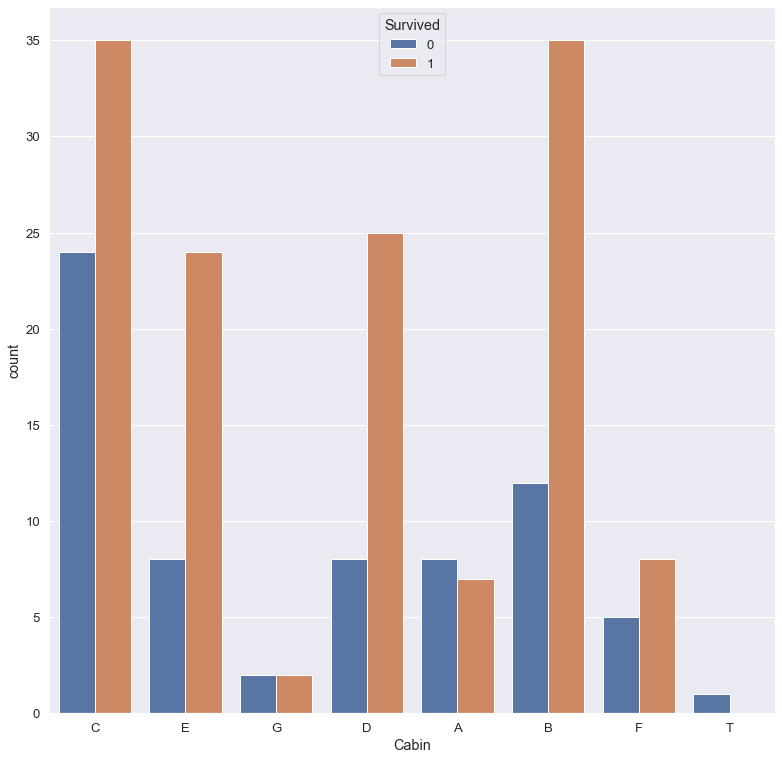

In [16]:
sns.countplot(x='Cabin',hue='Survived', data=df)

In [17]:
df.groupby('Cabin').describe()[['Fare','Pclass','Sex']].transpose()

Cabin                 A           B           C           D           E  \
Fare   count  15.000000   47.000000   59.000000   33.000000   32.000000   
       mean   39.623887  113.505764  100.151341   57.244576   46.026694   
       std    17.975333  109.301500   70.225588   29.592832   32.608315   
       min     0.000000    0.000000   26.550000   12.875000    8.050000   
       25%    30.847900   57.000000   42.502100   30.000000   26.112500   
       50%    35.500000   80.000000   83.475000   53.100000   45.181250   
       75%    50.247900  120.000000  143.591650   77.287500   56.157300   
       max    81.858300  512.329200  263.000000  113.275000  134.500000   
Pclass count  15.000000   47.000000   59.000000   33.000000   32.000000   
       mean    1.000000    1.000000    1.000000    1.121212    1.312500   
       std     0.000000    0.000000    0.000000    0.331434    0.644455   
       min     1.000000    1.000000    1.000000    1.000000    1.000000   
       25%     1.000000    1.000000    1.000000    1.000000    1.000000   
       50%     1.000000    1.000000    1.000000    1.000000    1.000000   
       75%     1.000000    1.000000    1.000000    1.000000    1.000000   
       max     1.000000    1.000000    1.000000    2.000000    3.000000   
Sex    count  15.000000   47.000000   59.000000   33.000000   32.000000   
       mean    0.933333    0.425532    0.542373    0.454545    0.531250   
       std     0.258199    0.499769    0.502478    0.505650    0.507007   
       min     0.000000    0.000000    0.000000    0.000000    0.000000   
       25%     1.000000    0.000000    0.000000    0.000000    0.000000   
       50%     1.000000    0.000000    1.000000    0.000000    1.000000   
       75%     1.000000    1.000000    1.000000    1.000000    1.000000   
       max     1.000000    1.000000    1.000000    1.000000    1.000000   

Cabin                 F          G     T  
Fare   count  13.000000   4.000000   1.0  
       mean   18.696792  13.581250  35.5  
       std    11.728217   3.601222   NaN  
       min     7.650000  10.462500  35.5  
       25%     7.750000  10.462500  35.5  
       50%    13.000000  13.581250  35.5  
       75%    26.000000  16.700000  35.5  
       max    39.000000  16.700000  35.5  
Pclass count  13.000000   4.000000   1.0  
       mean    2.384615   3.000000   1.0  
       std     0.506370   0.000000   NaN  
       min     2.000000   3.000000   1.0  
       25%     2.000000   3.000000   1.0  
       50%     2.000000   3.000000   1.0  
       75%     3.000000   3.000000   1.0  
       max     3.000000   3.000000   1.0  
Sex    count  13.000000   4.000000   1.0  
       mean    0.615385   0.000000   1.0  
       std     0.506370   0.000000   NaN  
       min     0.000000   0.000000   1.0  
       25%     0.000000   0.000000   1.0  
       50%     1.000000   0.000000   1.0  
       75%     1.000000   0.000000   1.0  
       max     1.000000   0.000000   1.0

In [18]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
df['NCabin']= label_encoder.fit_transform(df['Cabin'])

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master,Dr,Rev,NCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1,8
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,0,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0,0,8
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1,0,0,0,0,0,2


In [20]:
df['NCabin'] = np.where(df['NCabin']==8,np.nan,df['NCabin'])

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master,Dr,Rev,NCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,0,1,0,0,0,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0,0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1,0,0,0,0,0,2.0


In [22]:
df.groupby(['Sex','Pclass']).median('NCabin')['NCabin']

Sex  Pclass
0    1         2.0
     2         4.0
     3         6.0
1    1         2.0
     2         5.0
     3         5.0
Name: NCabin, dtype: float64

In [23]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
# cols = ['SibSp','Sex', 'Fare','Pclass','Survived','NCabin']
cols = ['SibSp','Sex', 'Fare','Pclass','Survived','NCabin']
XX = df[cols]
cc=imputer.fit_transform(XX)

In [24]:
df['NCabin']= cc[:,-1:]

In [25]:
df['NCabin'] = df['NCabin'].round()

In [26]:
df['NCabin'].value_counts()

5.0    419
4.0    165
2.0    130
3.0     87
1.0     70
0.0     15
6.0      4
7.0      1
Name: NCabin, dtype: int64

In [27]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master,Dr,Rev,NCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,5.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1,4.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,0,1,0,0,0,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0,0,5.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1,0,0,0,0,0,2.0


In [29]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer()
# cols = ['SibSp', 'Fare','NCabin','Pclass','Survived','Age']
cols = ['SibSp', 'Fare','NCabin','Pclass','Survived','Age']

XX = df[cols]
cc=imputer.fit_transform(XX)

In [30]:
df['Age']= cc[:,-1:]

In [31]:
df['Age'].value_counts()

21.000    35
24.000    30
22.000    27
28.000    27
30.000    26
          ..
23.500     1
20.400     1
39.800     1
21.600     1
21.584     1
Name: Age, Length: 143, dtype: int64

In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Mr               0
Miss             0
Mrs              0
Master           0
Dr               0
Rev              0
NCabin           0
dtype: int64

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master,Dr,Rev,NCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,5.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1,4.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,0,1,0,0,0,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,31.8,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0,0,5.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1,0,0,0,0,0,2.0


In [34]:
df = pd.get_dummies(df, columns=['NCabin'], drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Dr,Rev,NCabin_1.0,NCabin_2.0,NCabin_3.0,NCabin_4.0,NCabin_5.0,NCabin_6.0,NCabin_7.0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,0,0,1,0,0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,0,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,31.8,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Mr           891 non-null    int32  
 13  Miss         891 non-null    int32  
 14  Mrs          891 non-null    int32  
 15  Master       891 non-null    int32  
 16  Dr           891 non-null    int32  
 17  Rev          891 non-null    int32  
 18  NCabin_1.0   891 non-null    uint8  
 19  NCabin_2

In [36]:
df.drop(['Cabin'], axis=1,inplace=True)
# df.drop(['NCabin'], axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Mr           891 non-null    int32  
 12  Miss         891 non-null    int32  
 13  Mrs          891 non-null    int32  
 14  Master       891 non-null    int32  
 15  Dr           891 non-null    int32  
 16  Rev          891 non-null    int32  
 17  NCabin_1.0   891 non-null    uint8  
 18  NCabin_2.0   891 non-null    uint8  
 19  NCabin_3

In [38]:
import pandas_profiling

In [39]:
# pandas_profiling.ProfileReport(df)

<AxesSubplot:>

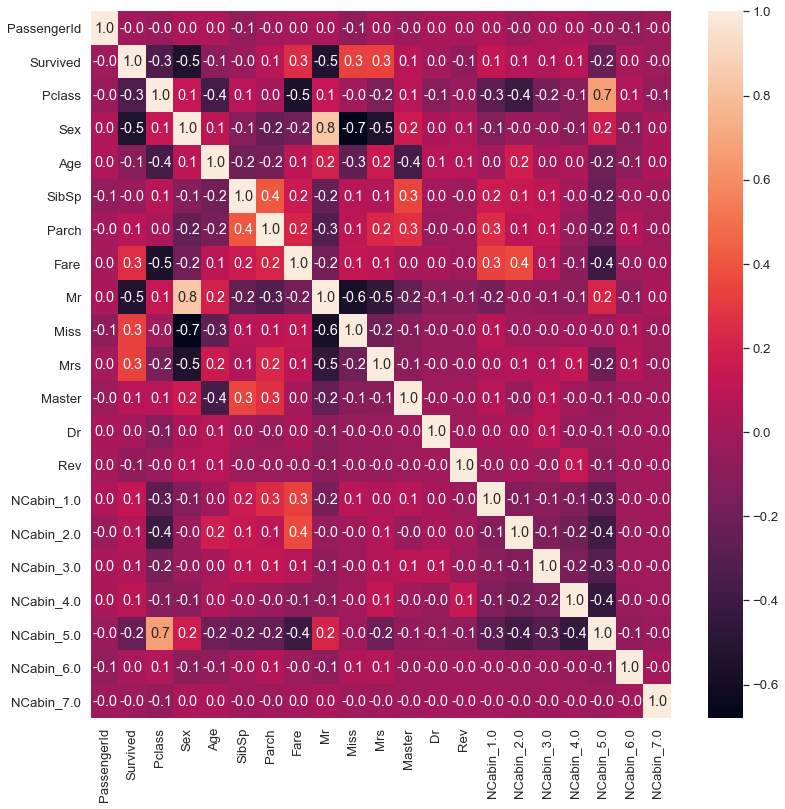

In [40]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Dr,Rev,NCabin_1.0,NCabin_2.0,NCabin_3.0,NCabin_4.0,NCabin_5.0,NCabin_6.0,NCabin_7.0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,0,0,1,0,0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,0,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,31.8,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,0,0


In [42]:
df.isna().sum().sort_values(ascending=False)

Embarked       2
NCabin_7.0     0
NCabin_6.0     0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Mr             0
Miss           0
Mrs            0
Master         0
Dr             0
Rev            0
NCabin_1.0     0
NCabin_2.0     0
NCabin_3.0     0
NCabin_4.0     0
NCabin_5.0     0
PassengerId    0
dtype: int64

In [43]:
missing_columns = list(df.isna().sum()[df.isna().sum()>1].index)

In [44]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Rev,NCabin_1.0,NCabin_2.0,NCabin_3.0,NCabin_4.0,NCabin_5.0,NCabin_6.0,NCabin_7.0,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,1,0,0,0,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,31.8,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,0,0,0


In [45]:
x = df.drop(['Survived','Name','Ticket','PassengerId'], axis=1)
y = df['Survived']

In [46]:
x.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Mr            0
Miss          0
Mrs           0
Master        0
Dr            0
Rev           0
NCabin_1.0    0
NCabin_2.0    0
NCabin_3.0    0
NCabin_4.0    0
NCabin_5.0    0
NCabin_6.0    0
NCabin_7.0    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [47]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [50]:
y_train.value_counts()

0    375
1    248
Name: Survived, dtype: int64

In [51]:
# from imblearn.under_sampling import RandomUnderSampler
# sampler = RandomUnderSampler()
# x_train, y_train = sampler.fit_resample(x_train, y_train)
# y_train.value_counts()

In [52]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_train, y_train = sampler.fit_resample(x_train, y_train)
y_train.value_counts()

1    375
0    375
Name: Survived, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [55]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [56]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.8173333333333334
Testing Accuracy: 0.8619402985074627
Testing Confusion Matrix: 
[[154  20]
 [ 17  77]]
Testing Recall: 0.8191489361702128
Testing Precesion: 0.7938144329896907
Testing F-1: 0.806282722513089
Testing F-Beta: 0.7987551867219916
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8746666666666667
Testing Accuracy: 0.8059701492537313
Testing Confusion Matrix: 
[[143  31]
 [ 21  73]]
Testing Recall: 0.776595744680851
Testing Precesion: 0.7019230769230769
Testing F-1: 0.7373737373737373
Testing F-Beta: 0.7156862745098037
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.8306666666666667
Testing Accuracy: 0.8544776119402985
Testing Confusion Matrix: 
[[156  18]
 [ 21  73]]
Testing Recall: 0.776595744680851
Testing Precesion: 0.8021978021978022
Testing F-1: 0.7891891891891892
Testing F-Beta: 0.796943231441048
------------------------------
Training Mod

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Testing Precesion: 0.7666666666666667
Testing F-1: 0.75
Testing F-Beta: 0.7599118942731278
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.5146666666666667
Testing Accuracy: 0.3619402985074627
Testing Confusion Matrix: 
[[  4 170]
 [  1  93]]
Testing Recall: 0.9893617021276596
Testing Precesion: 0.35361216730038025
Testing F-1: 0.5210084033613446
Testing F-Beta: 0.40575916230366493
------------------------------


In [58]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [60]:
y_test

542    0
406    0
721    0
140    0
691    1
      ..
168    0
281    0
137    0
633    0
420    0
Name: Survived, Length: 268, dtype: int64

In [61]:
import joblib
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']